<a href="https://colab.research.google.com/github/JainAnki/jupyter/blob/master/Sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG - artefact rejection


##Assignment - Part-A - Simulation


### 1.Generate three signal components - square, sawtooth and sine wave of 200 seconds at a sampling rate of 1kHz

Soln : 
> 1000 points in 1 second, 100 points in 0.1 sec

> 1 cycle in 0.02sec, 5 cycles in 0.1 sec, 100 points for 5 cycles

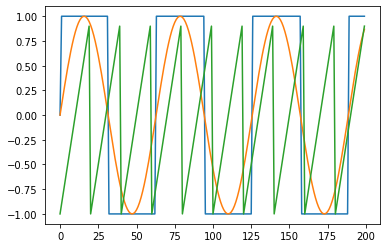

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#1000 points in 1 second, 100 points in 0.1 sec, 1 cycle in 0.02sec
#5 cycles in 0.1 sec, 100 points for 5 cycles
# sampling rate
sr = 1000.0
# sampling interval
ts = 1.0/sr
T = 200
t = np.arange(0,T,ts)

# frequency of the signal
freq = 50
s1 = np.sign(np.sin(2*50 * t))  #square signal
s2= np.sin(2* 50*t)  #sinusoidal signal
s3 = signal.sawtooth(2 *50* np.pi * t)  #sawtooth signal
plt.plot(s1[0:200])
plt.plot(s2[0:200])
plt.plot(s3[0:200])

### 2.Mix the signals in the following combinations
> a. Square: 20%; Sine: 20%; Sawtooth: 60%

> b. Square: 33%; Sine: 33%; Sawtooth: 34%

> c. Square: 60%; Sine: 20%; Sawtooth: 20%

> d.Add randomly distributed Gaussian noise before computing the mixed signals (standardize the signals before adding noise and mixing)


Text(0.5, 1.0, 'Mixed Signals')

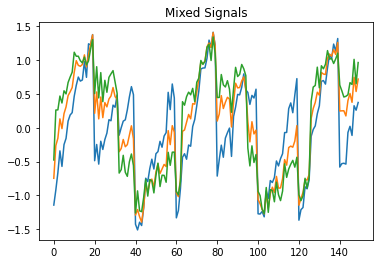

In [17]:
S_total = np.c_[s1, s2, s3]

S_total /= S_total.std(axis=0)  # Standardize data
S_total += 0.2 * np.random.normal(size=S_total.shape)  # Add noise

# Mix data
M = np.array([[0.2, 0.2, 0.6], [0.33, 0.33, 0.34], [0.6, 0.2, 0.2]]).T  # Mixing matrix in the form as given in the question
X = np.dot(S_total, M)  # Generate mixed signal
plt.plot(X[0:150] )
plt.title('Mixed Signals')

### 3. Deploy ICA and PCA to separate the signals into components


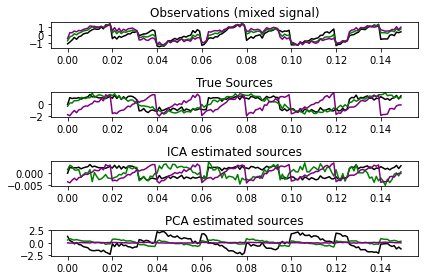

In [18]:
from sklearn.decomposition import FastICA, PCA
# compute ICA
ica = FastICA(n_components=3)
S_total_ica = ica.fit_transform(X)  # Get the estimated ICA sources
M_ica = ica.mixing_  # Get estimated mixing matrix

# compute PCA
pca = PCA(n_components=3)
S_total_pca = pca.fit_transform(X)  # Get estimated PCA sources


models = [X, S_total, S_total_ica, S_total_pca]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA estimated sources',
         'PCA estimated sources']
colors = ['k', 'g', 'purple']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(t[0:150],sig[0:150], color=color)
        

plt.tight_layout()

### 4.Answer the following questions
> a. Which of the methods was better? Why might it be?

>Soln: In comparison, Independent Component Analysis (ICA) was a better method, for the following reasons:

  >> a. Finds direction in the feature space related to the projections with high Non - Gaussianity unlike PCA

  >> b. These features may not be independent in the original feature space, but are inependent in the projected feature space unlike PCA which looks for orthogonal directions in the  original feature space

  >> c. ICA is utilised to estimate sources given noisy environments

> Mainly, PCA fails because the relevant signals in our problem reflect non-Gaussian processes
